# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas

import pandas as pd
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:

salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               33183 non-null  object 
 1   Job Titles         33183 non-null  object 
 2   Department         33183 non-null  object 
 3   Full or Part-Time  33183 non-null  object 
 4   Salary or Hourly   33183 non-null  object 
 5   Typical Hours      8022 non-null   float64
 6   Annual Salary      25161 non-null  float64
 7   Hourly Rate        8022 non-null   float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
# Your code here:

# percentage of missing data per column
round((salaries.isnull().sum() / len(salaries)) * 100, 2).sort_values(ascending=False)

Typical Hours        75.82
Hourly Rate          75.82
Annual Salary        24.18
Name                  0.00
Job Titles            0.00
Department            0.00
Full or Part-Time     0.00
Salary or Hourly      0.00
dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [9]:
# Your code here:

salaries[['Hourly Rate', 'Annual Salary']]

,Hourly Rate,Annual Salary
0,NaN,101442.0
1,NaN,94122.0
2,NaN,101592.0
3,NaN,110064.0
4,19.86,NaN
...,...,...
33178,NaN,72510.0
33179,NaN,48078.0
33180,NaN,90024.0
33181,NaN,93354.0


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [15]:
# Your code here:

salaries['Department'].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

In [17]:
# pivot table
salaries.pivot_table(index=['Department'], values=['Name'], aggfunc={'Name':'count'}).sort_values(by='Name', ascending=False)

,Name
Department,
POLICE,13414
FIRE,4641
STREETS & SAN,2198
OEMC,2102
WATER MGMNT,1879
AVIATION,1629
TRANSPORTN,1140
PUBLIC LIBRARY,1015
GENERAL SERVICES,980


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [19]:
from scipy.stats import ttest_rel, ttest_1samp

Our hypothesis will be:

    H0: μ ≠ 30/hr
    Ha: μ = 30/hr

In [28]:
hourly = salaries[salaries['Salary or Hourly'] == 'Hourly']

In [36]:
# Your code here:

ttest_1samp(hourly['Hourly Rate'], 30)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

In [99]:
t, p = ttest_1samp(hourly['Hourly Rate'], 30)
t, p

(20.6198057854942, 4.3230240486229894e-92)

In [37]:
p <= 0.05

True

In [100]:
(1 - p) * 100

100.0

el valor de p es muy bajo (4.32e-92) y menor a 0.05, con una casi del 100%, se podría asegurar que la hipótesis nula es falsa:
- H0 = el salario por hora de todos los trabajadores es significativamente diferente de $30/hora

y, por ende, la hipótesis alternativa es verdadera:
- Ha = el salario por hora de todos los trabajadores NO es significativamente diferente de $30/hora

In [72]:
round(np.mean(hourly['Hourly Rate']), 2)

32.79

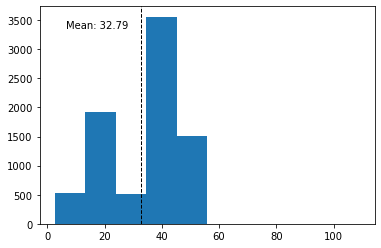

In [71]:
import matplotlib.pyplot as plt

plt.hist(hourly['Hourly Rate'])
plt.axvline(hourly['Hourly Rate'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(hourly['Hourly Rate'].mean()* 0.2, max_ylim*0.9, 'Mean: {:.2f}'.format(hourly['Hourly Rate'].mean()));

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

Our hypothesis will be:

    H0: μ > 86,000/year
    Ha: μ <= 86,000/year

In [77]:
# Your code here:

police_salaries = salaries[(salaries['Department'] == 'POLICE') & (salaries['Salary or Hourly'] == 'Salary')]
police_salaries

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
...,...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [86]:
t2, p2 = ttest_1samp(police_salaries['Annual Salary'], 86000)
t2, p2

(3.081997005712994, 0.0020603403550965137)

In [87]:
p2 <= 0.05

True

In [97]:
(1 - p2) * 100

99.79396596449035

el valor de p es menor a 0.05 (con 0.0020), con una confianza del 99.79%, se podría asegurar que la hipótesis nula es falsa:
- H0 = el salario anual es mayor a $86,000/año

y, por ende, la hipótesis alternativa es verdadera:
- Ha = el salario anual es igual o menor a $86,000/año

In [89]:
round(np.mean(police_salaries['Annual Salary']), 2)

86486.41

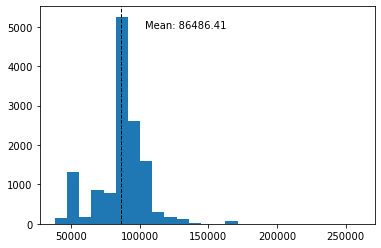

In [95]:
plt.hist(police_salaries['Annual Salary'], bins=25)
plt.axvline(police_salaries['Annual Salary'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(police_salaries['Annual Salary'].mean()* 1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(police_salaries['Annual Salary'].mean()));

Using the `crosstab` function, find the department that has the most hourly workers. 

In [102]:
# Your code here:

pd.crosstab(salaries['Department'], salaries['Salary or Hourly']).sort_values(by = 'Hourly', ascending = False)

# Streets & San department has the most hourly workers

Salary or Hourly,Hourly,Salary
Department,,
STREETS & SAN,1862,336
WATER MGMNT,1513,366
OEMC,1273,829
AVIATION,1082,547
GENERAL SERVICES,765,215
TRANSPORTN,725,415
PUBLIC LIBRARY,299,716
FAMILY & SUPPORT,287,328
CITY COUNCIL,64,347


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

Our hypothesis will be:

    H0: μ < 35/hour
    Ha: μ <= 35/hour

In [104]:
# Your code here:

streets_salaries = salaries[(salaries['Department'] == 'STREETS & SAN') & (salaries['Salary or Hourly'] == 'Hourly')]
streets_salaries.head(3)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
21,"ABDUL-SHAKUR, TAHIR",GENERAL LABORER - DSS,STREETS & SAN,F,Hourly,40.0,NaN,21.43
24,"ABERCROMBIE, TIMOTHY",MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60


In [108]:
t3, p3 = ttest_1samp(streets_salaries['Hourly Rate'], 35)
t3, p3

(-9.567447887848152, 3.3378530564707717e-21)

In [109]:
p3 <= 0.05

True

In [110]:
(1 - p3) * 100

100.0

el valor de p es menor a 0.05 (3.33e-21), con una confianza del 100%, se podría asegurar que la hipótesis nula es falsa:
- H0 = el salario por hora es menor a $35/hora

y, por ende, la hipótesis alternativa es verdadera:
- Ha = el salario por hora es igual o mayor a $35/hora

In [133]:
len(streets_salaries['Hourly Rate'])

1862

In [135]:
# count de valores menor que $35/hora

streets_salaries['Hourly Rate'][streets_salaries['Hourly Rate'] < 35].count()

421

In [136]:
# count de valores mayores o iguales que $35/hora

streets_salaries['Hourly Rate'][streets_salaries['Hourly Rate'] >= 35].count()

1441

In [111]:
round(np.mean(streets_salaries['Hourly Rate']), 2)

33.73

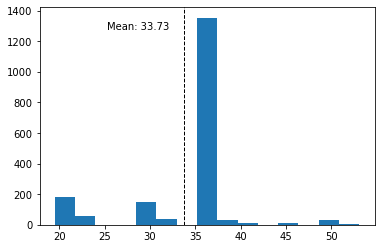

In [126]:
plt.hist(streets_salaries['Hourly Rate'], bins=15)
plt.axvline(streets_salaries['Hourly Rate'].mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(streets_salaries['Hourly Rate'].mean()* 0.75, max_ylim*0.9, 'Mean: {:.2f}'.format(streets_salaries['Hourly Rate'].mean()));

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [137]:
# Your code here:

stats.t.interval(alpha=0.95, df=len(hourly)-1, loc=np.mean(hourly['Hourly Rate']), scale=stats.sem(hourly['Hourly Rate']))

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [139]:
# Your code here:

stats.t.interval(alpha=0.95, df=len(police_salaries)-1, loc=np.mean(police_salaries['Annual Salary']), scale=stats.sem(police_salaries['Annual Salary']))

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

Our hypothesis will be:

    H0: μ =  25%
    Ha: μ != 25%
   

In [144]:
from statsmodels.stats.proportion import proportions_ztest

In [146]:
# Your code here:

t4, p4 = proportions_ztest(len(salaries[salaries['Salary or Hourly'] == 'Hourly']), len(salaries['Salary or Hourly']), value = 0.25)
t4, p4

(-3.5099964213703005, 0.0004481127249057967)

In [149]:
p4 <= 0.05

True

In [147]:
(1 - p4) * 100

99.95518872750942

el valor de p es menor a 0.05 (0.0004), con una confianza del 99.95%, se podría asegurar que la hipótesis nula es falsa:
- H0 = la cantidad de trabajadores por hora en Chicago es del 25%

y, por ende, la hipótesis alternativa es verdadera:
- Ha = la cantidad de trabajadores por hora en Chicago es diferente del 25%